Number of nodes: 4039
Number of edges: 88234


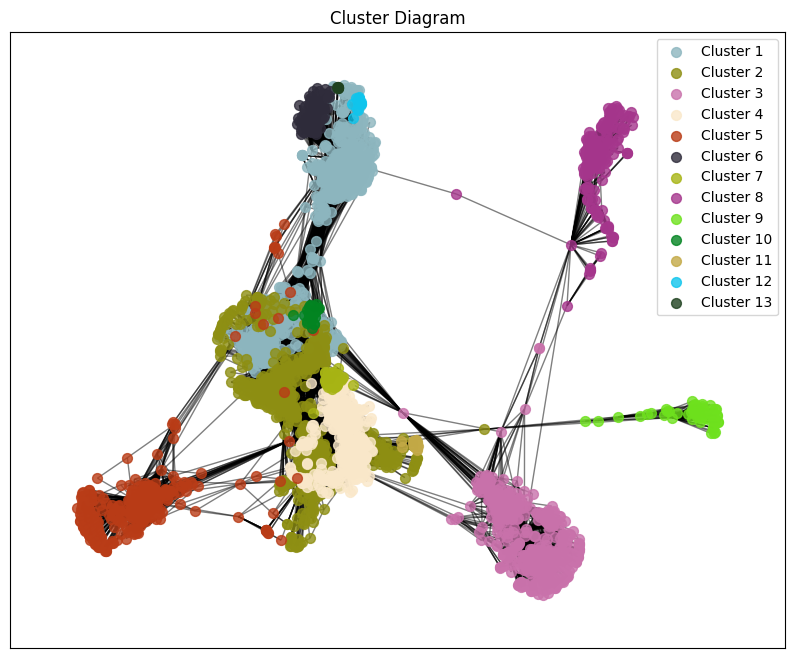

Average clustering coefficient: 0.6055467186200876
Network density: 0.010819963503439287
Size of largest connected component: 4039
Top 10 central nodes: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
ER Model - Clustering Coefficient: 0.010834865569452548, Density: 0.010815058381375938


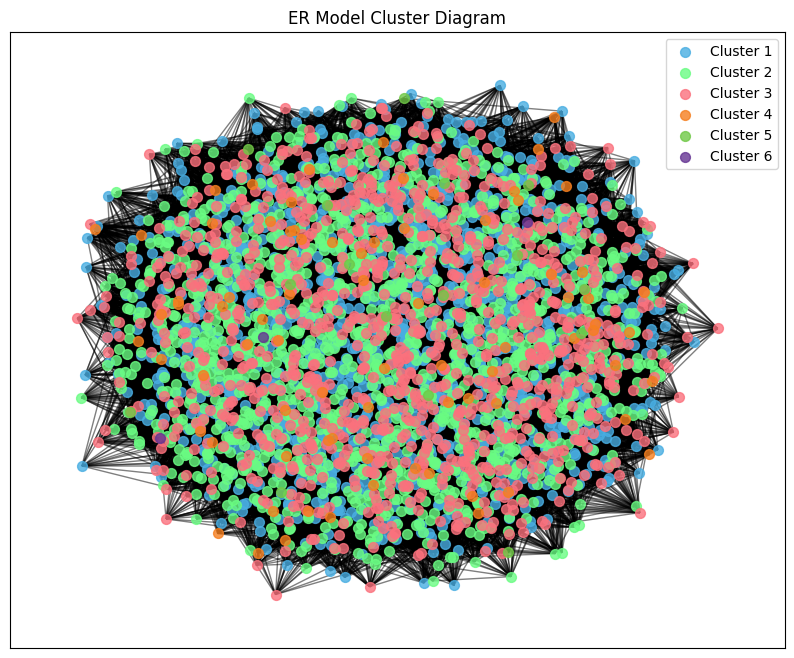

BA Model - Clustering Coefficient: 0.03566684317205764, Density: 0.010347109736532405


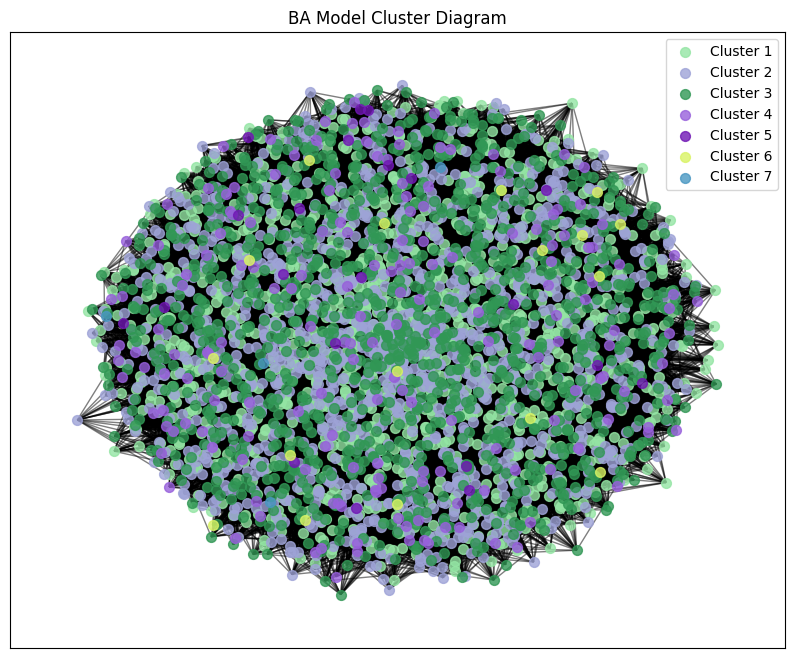

WS Model - Clustering Coefficient: 0.5328726980990522, Density: 0.010401188707280832


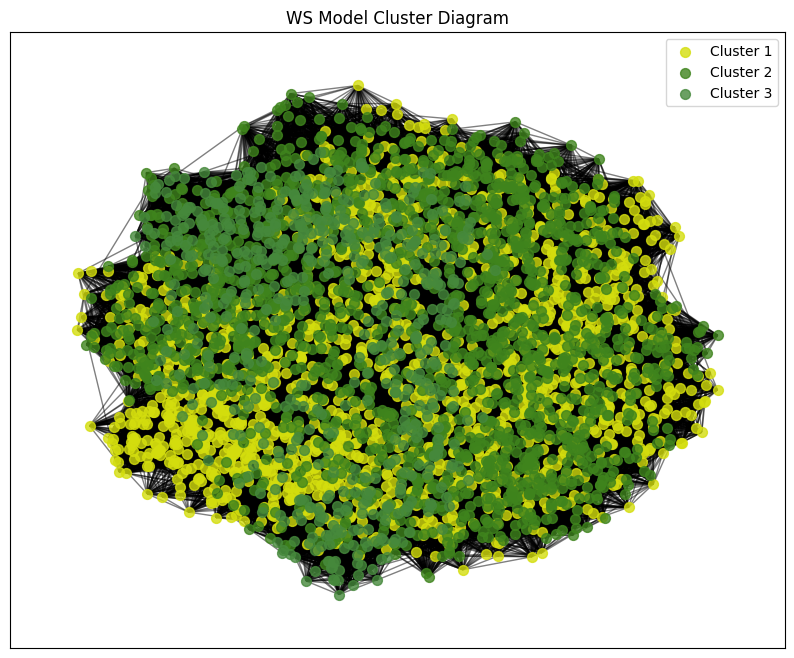

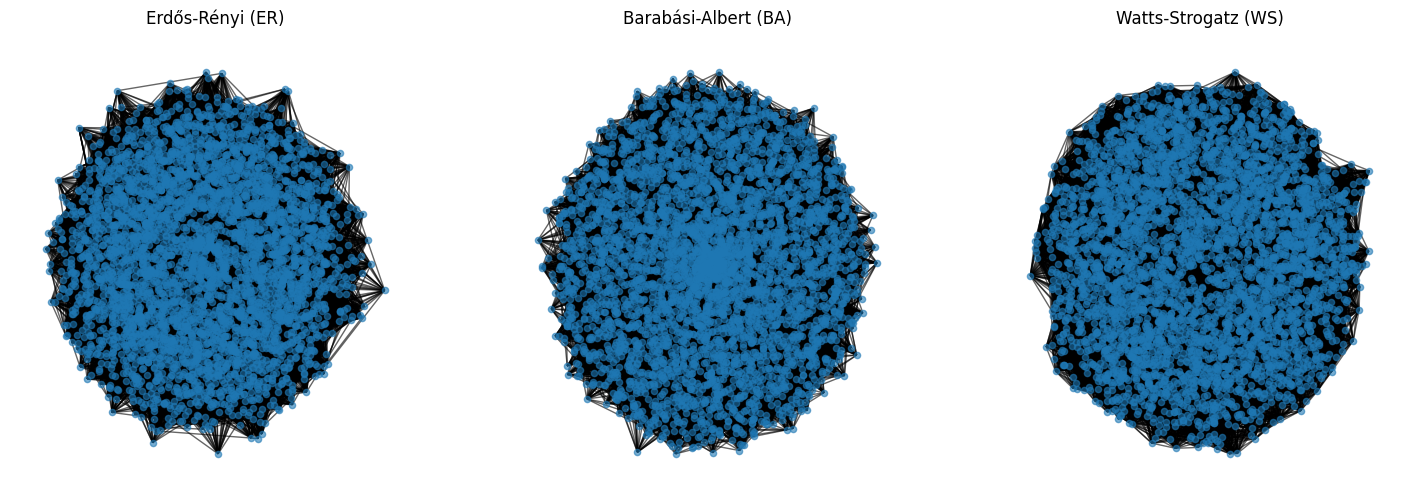

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the dataset
def load_graph(file_path):
    G = nx.read_edgelist(file_path, nodetype=int)
    return G

# Plot degree distribution
def plot_degree_distribution(G, title="Degree Distribution"):
    degrees = [deg for _, deg in G.degree()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=20, alpha=0.75, color='b', edgecolor='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    plot_degree_distribution(G)

# Plot clusters diagram with different colors
def plot_clusters(G, title="Cluster Diagram"):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    clusters = list(nx.community.greedy_modularity_communities(G))
    colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(clusters))]
    
    for i, cluster in enumerate(clusters):
        nx.draw_networkx_nodes(G, pos, nodelist=list(cluster), node_size=50, alpha=0.8, label=f'Cluster {i+1}', node_color=colors[i])
    
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

# Perform network analysis
def network_analysis(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    plot_clusters(G)
    
    clustering_coeff = nx.average_clustering(G)
    density = nx.density(G)
    
    print(f"Average clustering coefficient: {clustering_coeff}")
    print(f"Network density: {density}")
    
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Size of largest connected component: {len(largest_cc)}")

    centralities = nx.degree_centrality(G)
    top_nodes = sorted(centralities, key=centralities.get, reverse=True)[:10]
    print("Top 10 central nodes:", top_nodes)

# Compare with random graphs
def compare_graphs(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    
    ER = nx.erdos_renyi_graph(n, m / (n * (n-1)/2))
    BA = nx.barabasi_albert_graph(n, max(1, int(np.mean([deg for _, deg in G.degree()]) / 2)))
    WS = nx.watts_strogatz_graph(n, k=max(2, int(np.mean([deg for _, deg in G.degree()]))), p=0.1)
    
    for model, name in zip([ER, BA, WS], ["ER", "BA", "WS"]):
        print(f"{name} Model - Clustering Coefficient: {nx.average_clustering(model)}, Density: {nx.density(model)}")
        plot_clusters(model, title=f"{name} Model Cluster Diagram")

    # Plot network structures
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, model, name in zip(axes, [ER, BA, WS], ["Erdős-Rényi (ER)", "Barabási-Albert (BA)", "Watts-Strogatz (WS)"]):
        nx.draw_spring(model, node_size=20, alpha=0.6, ax=ax)
        ax.set_title(name)
    plt.show()

# Main execution
file_path = "C:/Users/ks615/Downloads/B107/facebook_combined.txt"
G = load_graph(file_path)
network_analysis(G)
compare_graphs(G)
